![Image](https://en.bitcoin.it/w/images/en/thumb/6/69/Btc-sans.png/174px-Btc-sans.png)

In [40]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this Jupyter notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [41]:
#!pip install blockchain --user
#!pip install plotly --user
#!pip install quandl --user
#!pip install pandas-highcharts --user
#!pint install ecdsa --user
#from blockchain import util

import plotly.tools as tls
import plotly.plotly as py
import pandas as pd
import numpy as np
import charts
import quandl
import ecdsa

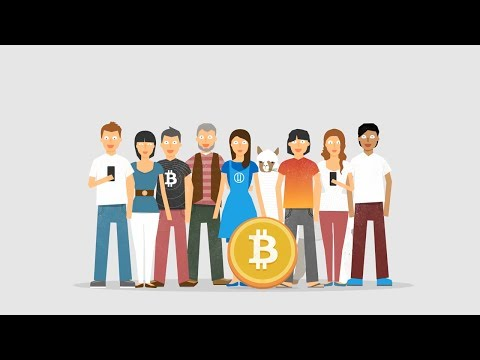

In [42]:
from IPython.display import YouTubeVideo

# What is Bitcoin?
YouTubeVideo('Gc2en3nHxA4')

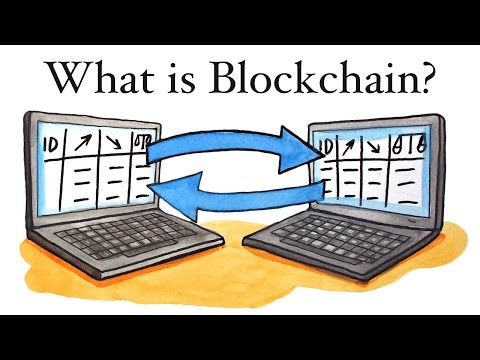

In [43]:
# Blockchain - A short Introduction
YouTubeVideo('WiRFuHXHBhk')

****
****
# Facts

* Bitcoin was invented in 2008 with the publication of a paper titled "Bitcoin: A Peer-to-Peer Electronic Cash System", written under the alias of Satoshi Nakamoto.
* Total market capitalisation of all crypto currenices is valued at ~ \$14 Billion (USD) https://coinmarketcap.com
* Bitcoins market capitalisation is currently at ~$12 Billion (USD)
* Bitcoin is a distributed, peer-to-peer system. 
* Bitcoins are entirely virtual.
* All Bitcoin transactions are recorded permanently on a distributed ledger called the “blockchain”
* Total number of bitcoins to be created will be 21 million (reached by the year 2140).
* Bitcoins are created through a process called "mining". Essentially, bitcoin mining decentralizes the currency-issuance and clearing functions of a central bank. 
* Due to Bitcoins deminising rate of issuance, over the long term, the bitcoin currency is deflationary.


#### Andreas M. Antonopoulos
A lot of material and code examples in this notebook are taken from "Mastering Bitcoin - Second Edition" by Andreas M. Antonopoulos.

https://github.com/bitcoinbook/bitcoinbook/tree/first_edition/code

****
****
# Terminology

* address: A bitcoin address consists of a string of letters and numbers starting with a "1" or a "3". Just like you ask others to send an email to your email address, you would ask others to send you bitcoin to your bitcoin address.

* bitcoin: The name of the currency unit (the coin), the network and the software.

* block: A grouping of transactions, marked with a timestamp, and a fingerprint of the previous block. The block header is hashed to produce a proof of work, thereby validating the transactions. Valid blocks are added to the main blockchain by network consensus.

* blockchain: A list of validated blocks, each linking to its predecessor all the way to the genesis block.

* confirmations: Once a transaction is included in a block, it has one confirmation. As soon as another block is mined on the same blockchain, the transaction has two confirmations, and so on. Six or more confirmations is considered sufficient proof that a transaction cannot be reversed.

* difficulty: A network-wide setting that controls how much computation is required to produce a proof of work.

* difficulty target: A difficulty at which all the computation in the network will find blocks approximately every 10 minutes.

* difficulty retargeting: A network-wdie recalculation of the difficulty that occurs once every 2,106 blocks and considers the hashing power of the previous 2,106 blocks.

* fees: The sender of a transaction often includes a fee to the network for processing the requested transaction. Most transactions require a minimum fee of 0.5 mBTC.

* hash: A digital fingerprint of some binary input.

* genesis block: The first block in the blockchain, used to initialize the cryptocurrency.

* miner: A network node that finds valid proof of work for new blocks, by repeated hashing.

* network: A peer-to-peer network that propogates transactions and blocks to every bitcoin node on the network.

* Proof-Of-Work: A piece of data that requires significant computation to find. In bitcoin, miners must find a numeric solution to the SHA256 algorithm that meets a network-wide target, the difficulty target.

* reward: An amount included in each new block as a reward by the network to the miner who found the Proof-Of-Work solution. It is currently 12.5BTC per block (halves every 4 years). 

* secret key (aka private key): The secret number that unlocks bitcoins sent to the corresponding address (aka public key).

* transaction: In simple terms, a transfer of bitcoins from one address to another. More precisely, a transaction is a signed data structure expressing a transfer of value. Transactions are transmitted over the bitcoin network, collected by miners, and included into blocks, made permanent on the blockchain.

* wallet: Software that holds all your bitcoin addresses and secret keys. Use it to send, receive, and store your bitcoin.


****
# Cryptographic Technologies

There are several cryptographic technologies that make up the essence of Bitcoin. 

Bitcoin makes use of two hashing functions, SHA-256 and RIPEMD-160, but it also uses Elliptic Curve DSA on the curve secp256k1 to perform signatures.


## Public Key Cryptography

Public key cryptography is used in a public key signature system. Digital signatures are created, in which a message is signed with the sender's private key and can be verified by anyone who has access to the sender's public key. Thus, a digital signature is a mathematical scheme for demonstrating the authenticity of a digital message or documents. 

Bitcoin uses a Elliptic Curve Digital Signature Algorithm (ECDSA) for its public key cryptography.
This algorithm is practically irreversible, meaning it is easy to calculate in one direction and infeasible to calculate in the opposite direction.

Each coin is associated with its current owner's public ECDSA key. When you send some bitcoins to someone, you create a message (transaction), attaching the new owner's public key (actually address) to this amount of coins, and sign it with your private key. For example, each time you spend bitcoins, you are creating a cryptographically-signed transaction that says "transfer 1234.56 bitcoins to public key ABCD." Only the person with the private key ABCD can then spend those 1234.56 BTC.

When this transaction is broadcast to the bitcoin network, this lets everyone know that the new owner of these coins is the owner of the new key. Your signature on the message verifies for everyone that the message is authentic. 




#### An example of using the Python ECDSA module for the elliptic curve math

In [44]:
import ecdsa
import os
from ecdsa.util import string_to_number, number_to_string

_p = 0xFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFEFFFFFC2FL
_r = 0xFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFEBAAEDCE6AF48A03BBFD25E8CD0364141L
_b = 0x0000000000000000000000000000000000000000000000000000000000000007L
_a = 0x0000000000000000000000000000000000000000000000000000000000000000L
_Gx = 0x79BE667EF9DCBBAC55A06295CE870B07029BFCDB2DCE28D959F2815B16F81798L
_Gy = 0x483ada7726a3c4655da4fbfc0e1108a8fd17b448a68554199c47d08ffb10d4b8L

curve_secp256k1 = ecdsa.ellipticcurve.CurveFp(_p, _a, _b)
generator_secp256k1 = ecdsa.ellipticcurve.Point(curve_secp256k1, _Gx, _Gy, _r)
oid_secp256k1 = (1, 3, 132, 0, 10)
SECP256k1 = ecdsa.curves.Curve("SECP256k1", curve_secp256k1, generator_secp256k1, oid_secp256k1)
ec_order = _r

curve = curve_secp256k1
generator = generator_secp256k1


def random_secret():
    convert_to_int = lambda array: int("".join(array).encode("hex"), 16)
    byte_array = os.urandom(32)
    return convert_to_int(byte_array)

def get_point_pubkey(point):
    if point.y() & 1:
        key = '03' + '%064x' % point.x()
    else:
        key = '02' + '%064x' % point.x()
    return key.decode('hex')

def get_point_pubkey_uncompressed(point):
    key = '04' + \
        '%064x' % point.x() + \
            '%064x' % point.y()
    return key.decode('hex')

# Generate a new private key.
secret = random_secret()
print "Secret: ", secret

# Get the public key point.
point = secret * generator
print "\nEC point:", point
print "\nBTC public key:", get_point_pubkey(point).encode("hex")

# Given the point (x, y) we can create the object using:
point1 = ecdsa.ellipticcurve.Point(curve, point.x(), point.y(), ec_order)
assert point1 == point



Secret:  76237831899587475007953335366204068918574578964553198785721111539663845823659

EC point: (82472819777588674531486320984894418862949022970513762376763169199628176729612,31528149306951794873419938592203353577610699268298236406523886886471329908304)

BTC public key: 02b655f637d5ee8cdd62bb1979749bb49ed95a730adac3d7b34ff2155dd9a6260c


## Cryptographic Hash Functions

A cryptographic "hashing algorithm" or simply "hash algorithm" is a one-way function that takes an arbitrary-sized input and produces a bit string of a fixed size. This output is known as the "hash" (fingerprint or digest).

The ideal cryptographic hash function has four main properties:

* it is quick to compute the hash value for any given message
* it is infeasible to generate a message from its hash value except by trying all possible messages (i.e. a brute-force search of possible inputs)
* a small change to a message should change the hash value so extensively that the new hash value appears uncorrelated with the old hash value
* it is infeasible to find two different messages with the same hash value (i.e. collisions)

The only way to map hash outputs to inputs is to just churn through inputs and outputs and record them in a lookup table. And hackers do that - they're called rainbow tables. That's why websites often add "salt" to something before they hash it. That "salt" is simply a small bit of extra arbitrary random data to add in, so that rainbow tables won't work. For example, your poor password "password1" is in a rainbow table, but if the site adds random letters like "x\$Q7fG" and takes the hash of "x\$Q7fGpassword1", that's probably not already in a rainbow table.


#### Python hashlib module

The python hashlib module implements a common interface to many different secure hash and message digest algorithms. Included are the Secure Hash Algorithms SHA1, SHA224, SHA256, SHA384, and SHA512 as well as RSA’s MD5 algorithm.


In [45]:
import hashlib

# A set containing the names of the hash algorithms that are available in the running Python interpreter. 
print 'Available hash algorithms:' 
print hashlib.algorithms_available

# Our message
m = 'Digital Assets are the future'

# Secure Hash Algorithm SHA256
h = hashlib.sha256()
h.update(m)

# hexadecimal representation of the hash. 
print '\nHex Digest for "Digital Assets are the future":'
print h.hexdigest()

# A small change to a message should change the hash value so extensively that the new hash value appears 
# uncorrelated with the old hash value
h = hashlib.sha256()
h.update('Digital Assets are the future!')
print '\nHex Digest for "Digital Assets are the future!":'
print h.hexdigest()

Available hash algorithms:
set(['SHA1', 'SHA224', 'SHA', 'SHA384', 'ecdsa-with-SHA1', 'SHA256', 'SHA512', 'md4', 'md5', 'sha1', 'dsaWithSHA', 'DSA-SHA', 'sha224', 'dsaEncryption', 'DSA', 'ripemd160', 'sha', 'MD5', 'MD4', 'sha384', 'sha256', 'sha512', 'RIPEMD160', 'whirlpool'])

Hex Digest for "Digital Assets are the future":
73aad924d616ef1ecb1b5c45f587b8feefa1bbb835749fd971cf81d79855fca0

Hex Digest for "Digital Assets are the future!":
fe092dcf67c0fe58e2b08578afc8f46d1156b9f76e369a00ff00d86e61f80f38


### Elliptic Curve Public Key to Bitcoin Address

A Bitcoin address is a 160-bit hash of the public portion of a public/private Elliptic Curve Digital Signature Algorithm (ECDSA) keypair. Hash values and the checksum data are converted to an alpha-numeric representation using a custom scheme: the Base58Check encoding scheme. Under Base58Check, addresses can contain all alphanumeric characters except 0, O, I, and l. Bitcoin addresses also contain a built-in check code, so it's generally not possible to send Bitcoins to a mistyped address. However, if the address is well-formed but no one owns it (or the owner lost their wallet.dat), any coins sent to that address will be lost forever. 

A bitcoin address is what appears most commonly in a transaction as the "recipient" of the funds !

The public key is revealed only when you spend money, because it is necessary to prove that the digital signature came from your private key. Thus, hashing the public key offers a security advantage. If elliptic curve cryptography starts to succcumb to attacks in which a private key can be extracted from a public key, using a public key hash forces the attacker to perform yet another difficult step of generating the public key from the hash. The added security only applies if you haven't reused addresses. Spending from an address publishes the corresponding public key to the block chain.

Certain theoretical future cryptographic attack vectors like quantum computers are said to be possibly capable of deriving the private key from the public key, but not from the hash of the public key (from the address). So the hashing provides considerable extra security.


![Image](https://en.bitcoin.it/w/images/en/thumb/9/9b/PubKeyToAddr.png/395px-PubKeyToAddr.png)




### Mining 

Adding a block to the block chain is difficult, requiring time and processing power to accomplish. The incentive to put forth this time and electricity is that the person who manages to produce a block gets a reward. This reward is two-fold. First, the block producer gets a bounty of some number of bitcoins, which is agreed-upon by the network. (Currently this bounty is 12.5 bitcoins; this value will halve every 210,000 blocks.) Second, any transaction fees that may be present in the transactions included in the block, get claimed by the block producer.

This gives rise to the activity known as "Bitcoin mining" - using processing power to try to produce a valid block, and as a result 'mine' some bitcoins. Mining requires a task that is very difficult to perform, but easy to verify. Thus, cryptographic hashing (SHA256) becomes a good way to implement the Bitcoin "proof-of-work".

The network rules are such that the difficulty is adjusted to keep block production to approximately 1 block per 10 minutes. Thus, the more miners engage in the mining activity, the more difficult it becomes for each individual miner to produce a block.  Conflicting or invalid transactions aren't allowed into a block, so the double spend problem is avoided.

The proof-of-work function iterates by perturbing data in the block by a nonce value, until the data in the block hashes to produce an integer below the target (e.g. a target hash value with a bunch of leading zeros). 

Currently, the miners on the Bitcoin network are doing about 2000K trillion hashes per second. That is, every second about 2,000,000,000,000,000,000 blocks gets hashed.

When a miner on the network finds a valid block, he relays the block to the rest of the network. All other miners check his work and make sure it’s valid. If so, they add the block to their local copy of the block chain and move on to finding the next block.


Besides being important for maintaining the transaction database, mining is also the mechanism by which bitcoins get created and distributed among the people in the bitcoin economy. The network rules are such that over the next hundred years, give or take a few decades, a total of 21 million bitcoins will be created. Rather than dropping money out of a helicopter, the bitcoins are awarded to those who contribute to the network by creating blocks in the block chain.


#### Example of iterating a nonce in a hashing algorithm's input

In [46]:
# example of iterating a nonce in a hashing algorithm's input
import hashlib
text = "I am Satoshi Nakamoto"

# iterate nonce from 0 to 19
for nonce in xrange(20):
    
    # add the nonce to the end of the text
    input = text + str(nonce)
    
    # calculate the SHA-256 hash of the input (text+nonce)
    hash = hashlib.sha256(input).hexdigest()
    
    # show the input and hash result
    print input, '=>', hash

I am Satoshi Nakamoto0 => a80a81401765c8eddee25df36728d732acb6d135bcdee6c2f87a3784279cfaed
I am Satoshi Nakamoto1 => f7bc9a6304a4647bb41241a677b5345fe3cd30db882c8281cf24fbb7645b6240
I am Satoshi Nakamoto2 => ea758a8134b115298a1583ffb80ae62939a2d086273ef5a7b14fbfe7fb8a799e
I am Satoshi Nakamoto3 => bfa9779618ff072c903d773de30c99bd6e2fd70bb8f2cbb929400e0976a5c6f4
I am Satoshi Nakamoto4 => bce8564de9a83c18c31944a66bde992ff1a77513f888e91c185bd08ab9c831d5
I am Satoshi Nakamoto5 => eb362c3cf3479be0a97a20163589038e4dbead49f915e96e8f983f99efa3ef0a
I am Satoshi Nakamoto6 => 4a2fd48e3be420d0d28e202360cfbaba410beddeebb8ec07a669cd8928a8ba0e
I am Satoshi Nakamoto7 => 790b5a1349a5f2b909bf74d0d166b17a333c7fd80c0f0eeabf29c4564ada8351
I am Satoshi Nakamoto8 => 702c45e5b15aa54b625d68dd947f1597b1fa571d00ac6c3dedfa499f425e7369
I am Satoshi Nakamoto9 => 7007cf7dd40f5e933cd89fff5b791ff0614d9c6017fbe831d63d392583564f74
I am Satoshi Nakamoto10 => c2f38c81992f4614206a21537bd634af717896430ff1de6fc1ee44a94973770

#### Example of proof-of-work algorithm

Running the following code, you can set the desired difficulty (in bits, how many of the leading bits must be zero) and see how long it takes for your computer to find a solution.

In [47]:
# example of proof-of-work algorithm
import hashlib
import time

# (2 ** 30 ~ 1 billion, 2 ** 31 ~ 2 billion, 2 ** 32 = 4 billion)
max_nonce = 2 ** 30

def proof_of_work(header, difficulty_bits):
    
    # calculate the difficulty target
    target = 2 ** (256-difficulty_bits)

    for nonce in xrange(max_nonce):
        hash_result = hashlib.sha256(str(header)+str(nonce)).hexdigest()
        
        # check if this is a valid result, below the target
        if long(hash_result, 16) < target:
            print "Success with nonce %d" % nonce
            print "Hash is %s" % hash_result
            return (hash_result,nonce)
 
    print "Failed after %d (max_nonce) tries" % nonce
    return nonce


nonce = 0
hash_result = ''

# difficulty from 0 to leading_zeros bits
leading_zeros = 20 # 25
for difficulty_bits in xrange(leading_zeros):
    
    difficulty = 2 ** difficulty_bits
    print "Difficulty: %ld (%d bits)" % (difficulty, difficulty_bits)
    print "Starting search..."

    # checkpoint the current time
    start_time = time.time()

    # make a new block which includes the hash from the previous block
    # we fake a block of transactions - just a string
    new_block = 'test block with transactions' + hash_result

    # find a valid nonce for the new block
    (hash_result, nonce) = proof_of_work(new_block, difficulty_bits)

    # checkpoint how long it took to find a result
    end_time = time.time()
    elapsed_time = end_time - start_time
    print "Elapsed Time: %.4f seconds" % elapsed_time

    if elapsed_time > 0:
        # estimate the hashes per second
        hash_power = float(long(nonce)/elapsed_time)
        print "Hashing Power: %ld hashes per second" % hash_power
        
    print '\n'

Difficulty: 1 (0 bits)
Starting search...
Success with nonce 0
Hash is ff8253ed10b5f719d52a709a66af8cd5e2054f702e675af4ca0cae70f0988634
Elapsed Time: 0.0000 seconds


Difficulty: 2 (1 bits)
Starting search...
Success with nonce 0
Hash is 22c608547e239faf5c353e7ebd204042760b93891d1d0be9ab488d36c73c077b
Elapsed Time: 0.0000 seconds


Difficulty: 4 (2 bits)
Starting search...
Success with nonce 2
Hash is 0635f41cdb98c6e73516f84fc88da19a13a3bac6298dbfc0df5170bac93ba4dd
Elapsed Time: 0.0000 seconds


Difficulty: 8 (3 bits)
Starting search...
Success with nonce 9
Hash is 1c1c105e65b47142f028a8f93ddf3dabb9260491bc64474738133ce5256cb3c1
Elapsed Time: 0.0000 seconds


Difficulty: 16 (4 bits)
Starting search...
Success with nonce 25
Hash is 0f7becfd3bcd1a82e06663c97176add89e7cae0268de46f94e7e11bc3863e148
Elapsed Time: 0.0000 seconds


Difficulty: 32 (5 bits)
Starting search...
Success with nonce 36
Hash is 029ae6e5004302a120630adcbb808452346ab1cf0b94c5189ba8bac1d47e7903
Elapsed Time: 0.0000 seco

****
****
# DATA
From https://blockchain.info and https://www.quandl.com

blockchain.info is a website that publishes data related to Bitcoin, updated daily.

****
## Bitcoin Hash Rate
The estimated number of tera hashes per second (trillions of hashes per second) the bitcoin network is performing.

In [48]:
import quandl
mydata = quandl.get("BCHAIN/HRATE", start_date="2013-01-01")
options = dict(height=500, title=dict(text='Bitcoin Hash Rate'), chart=dict(zoomType='xy'))
charts.plot(mydata, options, stock=True, show='inline', name="HRATE")

****
## Bitcoin Average Transaction Confirmation Time
The Average time take for transactions to be accepted into a block.


In [49]:
mydata = quandl.get("BCHAIN/ATRCT", start_date="2011-01-01")
options = dict(height=500, title=dict(text='Bitcoin Average Transaction Confirmation Time'))
charts.plot(mydata, options, stock=True, show='inline', name="ATRCT")

****
## Total Bitcoins
Data showing the historical total number of bitcoins which have been mined.

In [50]:
mydata = quandl.get("BCHAIN/TOTBC", start_date="2009-01-01")
options = dict(height=500, title=dict(text='Total Bitcoins Mined'))
charts.plot(mydata, options, stock=True, show='inline', name="TOTBC")

****
## Bitcoin Market Capitalization
The total USD value of bitcoin supply in circulation, as calculated by the daily average market price across major exchanges.

In [51]:
mydata = quandl.get("BCHAIN/MKTCP", start_date="2009-01-01")
options = dict(height=500, title=dict(text='Bitcoin Market Capitalization'))
charts.plot(mydata, options, stock=True, show='inline', name="MKTCP")

****
## Market Price (USD)
Average USD market price across major bitcoin exchanges

In [52]:
mydata = quandl.get("BCHAIN/MKPRU", start_date="2012-01-01")
options = dict(height=500, title=dict(text='Market Price (USD)'))
charts.plot(mydata, options, stock=True, show='inline', name="MKPRU")

****
## Bitcoin USD Exchange Trade Volume
The total USD value of trading volume on major bitcoin exchanges.

In [53]:
mydata = quandl.get("BCHAIN/TRVOU", start_date="2009-01-01")
options = dict(height=500, title=dict(text='Bitcoin USD Exchange Trade Volume'))
charts.plot(mydata, options, stock=True, show='inline', name="TRVOU")

****
## Bitcoin Difficulty
Difficulty is a measure of how difficult it is to find a hash below a given target.

In [54]:
mydata = quandl.get("BCHAIN/DIFF", start_date="2009-01-01")
options = dict(height=500, title=dict(text='Bitcoin Difficulty'))
charts.plot(mydata, options, stock=True, show='inline', name="DIFF")

****
## Bitcoin Average Transaction Confirmation Time
The Average time take for transactions to be accepted into a block (minutes).

In [55]:
mydata = quandl.get("BCHAIN/ATRCT", start_date="2009-01-01")
options = dict(height=500, title=dict(text='Bitcoin Average Transaction Confirmation Time'))
charts.plot(mydata, options, stock=True, show='inline', name="ATRCT")

****
****
# Trading


![Image](https://gemini.com/wp-content/themes/cedar/assets/img/Gemini-Horizontal-Dark.png)


Exchanges are subject to national and international regulations. Most require various forms of identification to comply with KYC (Know Your Customer) and AML (Anti-Money-Laundering) banking regulations.

Gemini is a fully regulated, fully compliant, New York-based digital asset exchange for both individuals and institutions. They are regulated by the New York State Department of Financial Services (NYSDFS). 

It was founded by Tyler and Cameron Winklevoss.

Gemini operates three distinct order matching engines, one for each of their trading pairs - BTC/USD, ETH/USD, and ETH/BTC.
Customers in a total of 38 U.S. states, Washington D.C., Canada, Hong Kong, Japan, Singapore, South Korea and the U.K. have full access to all of Gemini’s order matching engines.

The majority of customer digital assets (e.g., bitcoin) are held in their offline (i.e., air-gapped) vaulted storage system (“Cold Storage”). Only a small portion of digital assets are held in their online wallet (“Hot Wallet”).


We will use Gemini within the workshop.

Gemini's sandbox site is an instance of the Gemini Exchange that offers full exchange functionality using test funds.
All trades are conducted in play money, and there is no deposit or withdrawal functionality available.

Gemini offers both public and private REST APIs.

Public REST APIs provide market data such as:
* current order book
* recent trading activity
* trade history

Private REST APIs allow you to manage both orders and funds:
* place and cancel orders
* see your active orders
* see your trading history and trade volume
* get your available balances


Gemini also offers two WebSocket APIs for streaming data:
* a private Order Events API
* a public Market Data API

Advantages include:
* receive notifications in real time
* reduce the amount of data you have to transfer over the network
* reduce latency introduced by polling interval


### An example of using the REST APIs

In [56]:

import hmac, hashlib, time
import ConfigParser
import base64
import json
import requests

# Create custom authentication for Exchange
class GeminiAuth(object):
    def __init__(self):
           
        configParser = ConfigParser.RawConfigParser()
        configFilePath = r'C:\CryptoWorkshop\syek.cfg'        
        configParser.read(configFilePath)

        self.api_key = configParser.get('api', 'key')
        self.secret_key = configParser.get('api', 'secret_key')


    def setNonce(self):
        return str(int(time.time() * 1e6))

        
    def _generateSig(self, b64):
        return hmac.new(self.secret_key, b64, hashlib.sha384).hexdigest()
        
        
    def generateHeaders(self, b64):
        return { 'X-GEMINI-APIKEY': self.api_key, 
                'X-GEMINI-PAYLOAD': b64,
                'X-GEMINI-SIGNATURE': self._generateSig(b64) }


class GeminiRestAPI(object):
    def __init__(self):
        configParser = ConfigParser.RawConfigParser()
        configFilePath = r'C:\CryptoWorkshop\syek.cfg'        
        configParser.read(configFilePath)
        
        self.api_url = configParser.get('api', 'url')
        self.auth = GeminiAuth()


    def getTicker(self, symbol):   
        return requests.get(self.api_url + 'pubticker/' + symbol, timeout = 10).json()
   

    def postLimitOrder(self, symbol, side, amount, price):
        
        b64 = base64.b64encode(json.dumps({ "request": "/v1/order/new",
                                            "nonce": self.auth.setNonce(),
                                            
                                            "symbol": symbol,
                                            "amount": str(amount),
                                            "price": str(price),
                                            "side": side,
                                            "type": "exchange limit"}))
              
        headers = self.auth.generateHeaders(b64)
        return requests.post(self.api_url + 'order/new', headers = headers, timeout = 10).json()
    

    def postAvailableBalances(self):                               
        b64 = base64.b64encode(json.dumps({ "request": "/v1/balances",
                                            "nonce": self.auth.setNonce() }))
                
        headers = self.auth.generateHeaders(b64)
        return requests.post(self.api_url + 'balances', headers = headers, timeout = 10).json()

    

In [57]:
# Get a list of trading accounts
geminiRestAPI = GeminiRestAPI()
tradingAccounts = geminiRestAPI.postAvailableBalances()
print '\nAccounts: %s' % tradingAccounts

# Ticker
ticker = geminiRestAPI.getTicker('btcusd')
geminiASK = float(ticker.get('ask'))
geminiBID = float(ticker.get('bid'))

print '\nTicker: %s' % ticker
print '\nASK: [%s]' % geminiASK
print 'BID: [%s]' % geminiBID

# BUY Limit Order
geminiOrder = geminiRestAPI.postLimitOrder('btcusd', 'buy', 0.01, geminiASK) 
print '\nOrder: %s' % geminiOrder



Accounts: [{u'available': u'1072.1685776', u'currency': u'BTC', u'amount': u'1072.1685776', u'type': u'exchange', u'availableForWithdrawal': u'1072.1685776'}, {u'available': u'49992.25', u'currency': u'USD', u'amount': u'49992.25', u'type': u'exchange', u'availableForWithdrawal': u'49992.25'}, {u'available': u'20000', u'currency': u'ETH', u'amount': u'20000', u'type': u'exchange', u'availableForWithdrawal': u'20000'}]

Ticker: {u'ask': u'735.35', u'volume': {u'timestamp': 1479987600000L, u'USD': u'729537.52310652845', u'BTC': u'985.67985204'}, u'bid': u'735.32', u'last': u'735.32'}

ASK: [735.35]
BID: [735.32]

Order: {u'remaining_amount': u'0', u'avg_execution_price': u'735.35', u'exchange': u'gemini', u'order_id': u'53822816', u'timestamp': u'1479987687', u'symbol': u'btcusd', u'executed_amount': u'0.01', u'id': u'53822816', u'price': u'735.35', u'is_live': False, u'was_forced': False, u'is_cancelled': False, u'is_hidden': False, u'original_amount': u'0.01', u'type': u'exchange limi

### References

* https://bitcoin.org
* https://www.bitcoin.com
* https://bitcoincharts.com/markets
* https://blockchain.info
* https://bitcoinmagazine.com/
* http://www.coindesk.com/
* https://coinmarketcap.com
* https://www.cs.princeton.edu/courses/archive/spring14/cos461/docs/rec09-crypto.pdf
* https://www.cryptocompare.com
* https://en.bitcoin.it/wiki/Main_Page
* https://news.bitcoin.com
* https://antonopoulos.com
* https://github.com/bitcoinbook/bitcoinbook/tree/first_edition/code
* https://gemini.com/


### http://mintegration.co.uk
![Image](http://mintegration.co.uk/img/mintegration_coin.svg)